# Исследование объявлений о продаже квартир

У нас имеются данные сервиса Яндекс.Недвижимость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Для дальнейшего построения автоматизированной системы, которая позволит отследит аномалии и мошенническую деятельность, нам на основании данных необходимо установить: 
1. сколько обычно занимает продажа квартиры (когда можно считать, что продажи прошли очень быстро, а когда долго);
2. какие факторы больше всего влияют на стоимость квартиры в Санкт-Петербурге и соседних населённых пунктах и стоимость квартиры в центре Санкт-Петербурга (зависит ли цена от квадратного метра, числа комнат, этажа, удалённости от центра, от даты размещения).

## Изучение данных из файла

### Импортируем библиотеки, прочитаем файл data.csv и сохраним его в переменной data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Посмотрим 15 случайных значений таблицы - это позволяет сделать метод sample

In [2]:
pd.set_option('display.max_columns', 50)
data.head()
display(data.sample(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15540,10,6300000.0,38.6,2019-03-27T00:00:00,1,2.70,16.0,20.3,3,NaN,False,False,9.80,NaN,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,NaN
18796,7,1670000.0,55.0,2018-02-22T00:00:00,3,2.60,3.0,38.0,3,NaN,False,False,7.80,2.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,55.0
12705,20,6500000.0,60.0,2019-02-13T00:00:00,3,NaN,10.0,42.0,10,NaN,False,False,7.00,1.0,Санкт-Петербург,10596.0,13971.0,0.0,NaN,0.0,NaN,4.0
10985,13,3850000.0,40.0,2018-10-09T00:00:00,1,2.60,9.0,18.0,4,NaN,False,False,12.00,NaN,Санкт-Петербург,32752.0,13851.0,0.0,NaN,1.0,651.0,28.0
2466,6,3100000.0,31.8,2017-09-30T00:00:00,1,2.50,4.0,17.2,4,NaN,False,False,5.00,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,150.0
10899,11,1700000.0,67.0,2018-07-27T00:00:00,3,2.55,5.0,41.5,5,NaN,False,False,8.50,NaN,городской посёлок Назия,NaN,NaN,NaN,NaN,NaN,NaN,161.0
18244,14,3500000.0,41.7,2016-04-29T00:00:00,3,NaN,5.0,29.8,3,False,False,False,5.40,0.0,Санкт-Петербург,11413.0,15779.0,0.0,NaN,1.0,332.0,259.0
2971,11,7000000.0,65.0,2018-12-06T00:00:00,3,2.60,14.0,41.7,8,NaN,False,False,8.00,1.0,Санкт-Петербург,33446.0,11459.0,1.0,487.0,1.0,759.0,NaN
13278,4,2590000.0,37.0,2018-08-13T00:00:00,1,NaN,12.0,NaN,6,NaN,False,False,NaN,2.0,Санкт-Петербург,19212.0,22637.0,0.0,NaN,1.0,457.0,21.0
14641,8,4320000.0,44.0,2016-03-28T00:00:00,2,2.55,15.0,27.0,10,False,False,False,6.30,2.0,Санкт-Петербург,51842.0,14019.0,0.0,NaN,1.0,800.0,333.0


В нашей таблице  можно увидеть пропущенные значения - NaN и нулевые значения, которые нужно будет заменить далее, удалить, если это не окажет сильное влияние на нашу выборку или оставить без изменений, если мы не используем их в исследовании

### Получим сводную информацию о таблице data методом info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

По общей информации о данных таблицы можно обратить внимание, что встречаются неправильный тип данных и пропущенные значения в следующих колонках:
* airports_nearest — пропущенные значения
* balcony — пропущенные значения
* ceiling_height — пропущенные значения
* cityCenters_nearest — пропущенные значения
* days_exposition — пропущенные значения
* first_day_exposition — должен быть тип datetime
* floors_total — должен быть тип int, пропущенные значения
* is_apartment — должен быть тип bool, пропущенные значения
* kitchen_area — пропущенные значения
* living_area — пропущенные значения
* locality_name — пропущенные значения
* parks_around3000 — тип должен быть int, пропущенные значения
* parks_nearest — пропущенные значения
* ponds_around3000 — тип должен быть int, пропущенные значения
* ponds_nearest — пропущенные значения

### Посчитаем долю пропущенных значений методом isna и округлим полученные значения до одного знака после запятой

In [4]:
pd.DataFrame(round((data.isna().mean()*100), 1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


* В переменной ceiling_height (высота потолков) пропущено 38,8% значений. Так как данный признак будет использоваться в анализе, необходимо будет заменить пропущенные значения на медиану для домов конкретной этажности, либо на общую медиану.


* В переменной floors_total (всего этажей в доме) пропущено 0,4% значений. Так как этот признак тоже будет использоваться в анализе, но при этом мы имеем небольшой процент пропусков и у нас нет возможности заменить их на достоверные значения, мы их удалим (это не сильно повлияет на нашу выборку).


* В переменной living_area (жилая площадь) пропущено 8% значений и в переменной kitchen_area (площадь кухни) пропущено 9,6% значений, заполняем пропуски площади, поделив цену на момент снятия с публикации на стоимость 1 м² и медианными значениями для переменной kitchen_area


* В переменной balcony (число балконов) предположим, что отсутствие числа балконов указывает на то, что число балконов равно нулю


* В следующих переменных мы оставим пропущенные значения, так как они не будут использоваться в нашем исследовании, а их заполнение может вызвать смещение:
 + airports_nearest (расстояние до ближайшего аэропорта);
 + parks_around3000 (число парков в радиусе 3 км);
 + parks_nearest (расстояние до ближайшего парка);
 + ponds_around3000 (число водоёмов в радиусе 3 км);
 + ponds_nearest (расстояние до ближайшего водоёма).


* В переменной locality_name (название населённого пункта) пропущено 0,2% значений. Так как этот признак будет использоваться в анализе и при этом мы имеем небольшой процент пропусков, но у нас нет возможности заменить их на достоверные значения, то мы их удалим


* В переменной cityCenters_nearest (расстояние до центра города) пропущено 23,3% значений. Этот признак будет использоваться  в анализе, но поскольку трудоемкость заполнения пропусков велика по сравнению с их общим количеством, оставим данные без изменений

### Вывод

Общее количество значений в наших данных 23699. Всего в таблице 22 столбца (признака):

1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. first_day_exposition — дата публикации
7. floor — этаж
8. floors_total — всего этажей в доме
9. is_apartment — апартаменты (булев тип)
10. kitchen_area — площадь кухни в квадратных метрах (м²)
11. last_price — цена на момент снятия с публикации
12. living_area — жилая площадь в квадратных метрах (м²)
13. locality_name — название населённого пункта
14. open_plan — свободная планировка (должен быть булев тип)
15. parks_around3000 — число парков в радиусе 3 км
16. parks_nearest — расстояние до ближайшего парка (м)
17. ponds_around3000 — число водоёмов в радиусе 3 км
18. ponds_nearest — расстояние до ближайшего водоёма (м)
19. rooms — число комнат
20. studio — квартира-студия (булев тип)
21. total_area — площадь квартиры в квадратных метрах (м²)
22. total_images — число фотографий квартиры в объявлении

Каждая строка таблицы содержит информацию об объектах недвижимости в Санкт-Петербурге и соседних населённых пунктах, которые описываются на основании этих 22 признаков (17 количественных, 4 категориальных и 1 временной), при этом в таблице имеются нулевые значения, у 15 признаков имеются пропущенные значения, неподходящий тип данных у 6 признаков:

1. airports_nearest — пропущенные значения
2. balcony — пропущенные значения, тип данных на int
3. ceiling_height — пропущенные значения
4. cityCenters_nearest — пропущенные значения
5. days_exposition — пропущенные значения
6. first_day_exposition — тип данных должен быть тип datetime
7. floors_total — пропущенные значения, тип данных на int
8. is_apartment — пропущенные значения, тип данных на bool
9. kitchen_area — пропущенные значения
10. living_area — пропущенные значения
11. locality_name — пропущенные значения
12. parks_around3000 — пропущенные значения, тип данных на int
13. parks_nearest — пропущенные значения
14. ponds_around3000 — пропущенные значения, тип данных на int
15. ponds_nearest — пропущенные значения

## Предобработка данных

### Удалим пропущенные значение в переменной locality_name (название населённого пункта) с помощью функции dropna

In [5]:
data.dropna(subset = ['locality_name'], inplace=True)
data['locality_name'].isna().sum()

0

### Запишем значения высот потолков по району на место пропусков в ceiling_height (высота потолков)

In [6]:
# переведем данные в вещественный тип
data['ceiling_height'] = data['ceiling_height'].astype('float64')

# сгруппируем высоту потолков в зависимости от района
median_height = data['ceiling_height'].median()
# mean_height=data.groupby('locality_name')['ceiling_height'].transform('mean')
data['ceiling_height'].fillna(median_height, inplace=True)

# запишем на место пропусков средние значения высот потолков по району
# data['ceiling_height'].mean() # средняя высота потолка из всей выборки

data['ceiling_height'].isna().sum() #выведем сумму NaN

0

### Заполним пропущенные значения в переменной living_area (жилая площадь)

In [7]:
# меняем тип данных на вещественный для living_area и last_price
data['living_area'] = data['living_area'].astype('float64')
data['last_price'] = data['last_price'].astype('float64')

In [8]:
# создадим столбец со стоимостью за м²
data['price_for_m2'] = data['last_price'] / data['living_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,254901.960784
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.526882
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.880466
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.000000


In [9]:
# сгруппируем по району
grouped_price = data.groupby('locality_name')['price_for_m2'].transform('mean')
nan = data.groupby('locality_name')['price_for_m2'].mean()
nan.sort_values()

locality_name
деревня Малая Романовка    14808.362369
деревня Старополье         14851.485149
деревня Выскатка           18856.907895
поселок Тёсово-4           20833.333333
поселок Совхозный          22600.000000
                               ...     
поселок Севастьяново                NaN
поселок станции Лужайка             NaN
посёлок Левашово                    NaN
посёлок Петро-Славянка              NaN
посёлок Плоское                     NaN
Name: price_for_m2, Length: 364, dtype: float64

In [10]:
# заполним пропуски значением стоимости 1 м² в зависимости от района
data['price_for_m2'].fillna(grouped_price, inplace=True)

In [11]:
# удалим, если остались значения NaN
data.dropna(subset = ['price_for_m2'], inplace=True)
data['price_for_m2'].isna().sum()

0

In [12]:
# заполним пропуски площади разделив цену квартиры на стоимость 1 м²
data['living_area'].fillna(data['last_price'] / data['price_for_m2'], inplace=True)
data['living_area'].isna().sum()

0

### Заполним пропущенные значения в переменной kitchen_area (площадь кухни в квадратных метрах)

In [13]:
data['kitchen_area'] = data['kitchen_area'].astype('float64')

#заполним пропуски медианным значеним
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['total_area'] = data['total_area'].astype('float64')

### Заполним пропущенные значения в переменной balcony (число балконов) с помощью функции fillna

In [14]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().value_counts()
data['balcony'] = data['balcony'].astype('int64')
data['balcony'].isnull().sum()

0

### Изменим тип данных в переменной  first_day_exposition (дата публикации) на datetime

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Удалим пропущенные значения и изменим тип данных в переменной floors_total  (всего этажей в доме)

In [16]:
data.dropna(subset = ['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype('int64')

### Заполним пропуски и изменим тип данных в переменной is_apartment (апартаменты) на bool

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool')
data['is_apartment'].isnull().sum()

0

### Посчитаем теперь долю пропущенных значений

In [18]:
pd.DataFrame(round((data.isna().mean()*100), 1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


Заполнили пропущенные значения, но так как процент попусков велик и нет возможности заполнить достоверными значениями, оставим следующие переменные без изменений: 
* airports_nearest
* cityCenters_nearest
* days_exposition
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest

 ### Получим сводную информацию о таблице

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23548 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23548 non-null  int64         
 1   last_price            23548 non-null  float64       
 2   total_area            23548 non-null  float64       
 3   first_day_exposition  23548 non-null  datetime64[ns]
 4   rooms                 23548 non-null  int64         
 5   ceiling_height        23548 non-null  float64       
 6   floors_total          23548 non-null  int64         
 7   living_area           23548 non-null  float64       
 8   floor                 23548 non-null  int64         
 9   is_apartment          23548 non-null  bool          
 10  studio                23548 non-null  bool          
 11  open_plan             23548 non-null  bool          
 12  kitchen_area          23548 non-null  float64       
 13  balcony         

Изменили типы данных в следующих переменных:
* balcony — тип данных на int
* first_day_exposition — тип данных на datetime
* floors_total — тип данных на int
* is_apartment — тип данныз на bool

Перейдём к расчетной части

### Вывод

Преимущественно заполнили пропущенные значения в переменных, но так как процент попусков велик и нет возможности заполнить достоверными значениями, оставим следующие переменные без изменений:
* airports_nearest
* cityCenters_nearest
* days_exposition
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest

Изменили типы данных в следующих переменных:
* balcony — тип данных на int
* first_day_exposition — тип данных на datetime
* floors_total — тип данных на int
* is_apartment — тип данныз на bool

## Расчёты и добавление результатов в таблицу

### Расчитаем и добавим в таблицу цены квадратного метра

In [20]:
data['price_per_square_meter'] = round(data['last_price'] / data['total_area'], 1)
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

### Добавим в таблицу: день недели, месяц и год публикации объявления

In [21]:
# создадим столбец день недели
data['weekday'] = data['first_day_exposition'].dt.weekday

# создадим столбец месяц
data['month'] = data['first_day_exposition'].dt.month

# создадим столбец год
data['year'] = data['first_day_exposition'].dt.year

### Добавим в талицу этаж квартиры. Для категоризации по этажем применим метод apply к каждой строке датафрейма через axis = 1

In [22]:
# функция категоризации этажей
def floor_group(row):
    what_floor = row['floor']
    total_floor = row['floors_total']
    if what_floor == 1:
        return 'Первый этаж'
    if what_floor == total_floor:
        return 'Последний этаж'
    return 'Другой этаж'

In [23]:
floor_position = data.apply(floor_group, axis=1)

In [24]:
# создадим новый столбец
data['Floor_position'] = floor_position

### Рассчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей

In [25]:
# добавим столбец соотношения жилой площади к общей площади
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)

# добавим столбец отношения площади кухни к общей площади
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

### Вывод

Рассчитали и добавили в таблицу следующие колонки: 
* цена квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры (категоризировали данные по этажам: первый, последний, другой)
* соотношение жилой и общей площади
* отношение площади кухни к общей площади


Далее изучим данные по следующим параметрам: площадь, цена, число комнат, высота потолков

## Исследовательский анализ данных

### Изучим данные по параметру площадь квартиры

**Добавим функцию, чтобы при изучении параметров избавиться от выбросов:**

In [26]:
def det_whiskers(column):
    stat = data[column].describe()
    
    # межквартильный размах
    iqr = stat[6] - stat[4]
    
    # левый и правый ус 
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # левый ус не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    # правый ус не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

**Построим диаграмму размаха**

count    23548.000000
mean        60.324756
std         35.649466
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

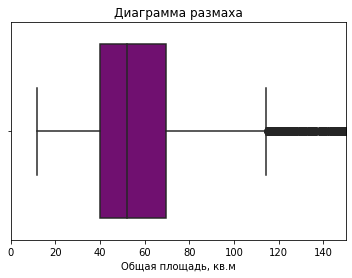

In [27]:
sns.boxplot(data['total_area'], color='purple')
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 150)

#выведем числовое описание данных
data['total_area'].describe()

**Построим гистограмму общей площади**

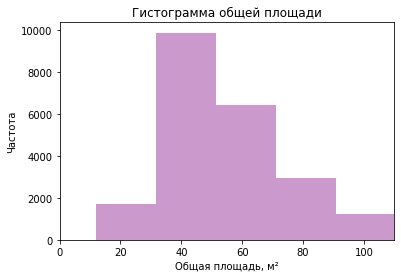

In [28]:
sns.distplot(data['total_area'], kde=False, bins=45, color='purple')
plt.xlim(0, 110)
plt.title('Гистограмма общей площади')
plt.ylabel('Частота')
plt.xlabel('Общая площадь, м²')
plt.show()

Больше всего продается квартир площадью 40-69.7 м². В целом, в нашей выборке площадь квартир принимает значения от 12 до 900 м², при этом среднее значение равно 60, а медиана - 52 м²

**Зададим функцию, вычисляющую долю аномальных значений**

In [29]:
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('total_area')

'Аномальные значения составляют 5.3% от всей выборки'

Добавим столбец с признаком, описывающим аномально большую площадь недвижимости

In [30]:
data['too_large_area'] = data['total_area'] > det_whiskers('total_area')[1]

### Изучим наши данные по параметру цена

**Построим диаграмму размаха**

count    2.354800e+04
mean     6.543164e+06
std      1.091408e+07
min      1.219000e+04
25%      3.411750e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

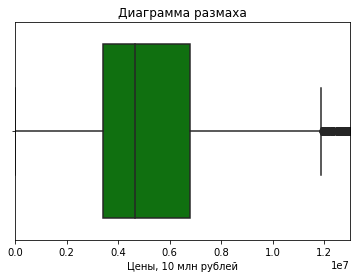

In [31]:
sns.boxplot(data['last_price'], color='green')
plt.title('Диаграмма размаха')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.xlim(0, 13000000)

#выведем числовое описание данных
data['last_price'].describe()

**Построим гистограмму**

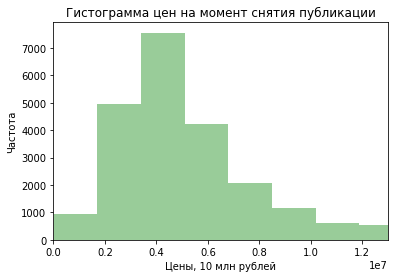

In [32]:
sns.distplot(data['last_price'], kde=False, bins=450, color='green')
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.ylabel('Частота')

Больше всего продается квартир за 3.4-6.8 млн руб. Цены на недвижимость имеют среднее значение в 6.5 млн руб., медиана - 4.6 млн руб

**Посмотрим долю аномальных значений**

In [33]:
print_anomalies_ratio('last_price')

'Аномальные значения составляют 8.7% от всей выборки'

Добавим столбец с признаком, описывающим аномально дорогую недвижимость

In [34]:
data['too_expensive'] = data['last_price'] > det_whiskers('last_price')[1]

### Изучим данные по параметру число комнат

**Построим диаграмму размаха**

count    23548.000000
mean         2.070664
std          1.078568
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

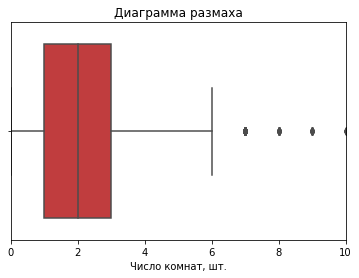

In [35]:
sns.boxplot(data['rooms'], color='tab:red')
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')
_ = plt.xlim(0, 10)

#выведем числовое описание данных
data['rooms'].describe()

**Построим гистограмму**

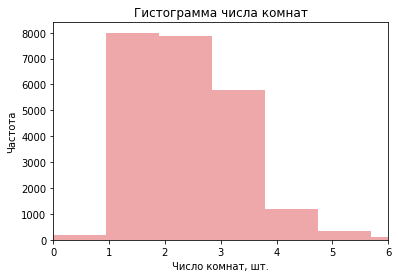

In [36]:
sns.distplot(data['rooms'], kde=False, bins=20, color='tab:red')
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Частота')

Больше всего продается однокомнатных, двухкомнатных квартир и трехкомнатных. Количество комнат находится в диапазоне от 1 до 19

Посмотрим долю аномальных значений

In [37]:
print_anomalies_ratio('rooms')

'Аномальные значения составляют 0.4% от всей выборки'

Добавим столбец с признаком, описывающим недвижимость с аномально большим числом комнат

In [38]:
data['too_many_rooms'] = data['rooms'] > det_whiskers('rooms')[1]

### Изучим данные по параметру высота потолков

**Построим диаграмму размаха**

count    23548.000000
mean         2.724605
std          0.991378
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

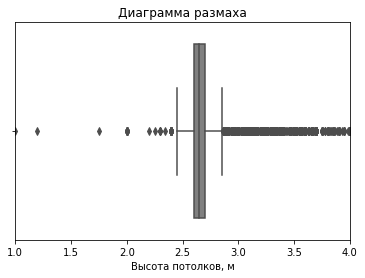

In [39]:
sns.boxplot(data['ceiling_height'], color='gray')
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м')
_ = plt.xlim(1, 4)

#выведем числовое описание данных
data['ceiling_height'].describe()

**Построим гистограмму**

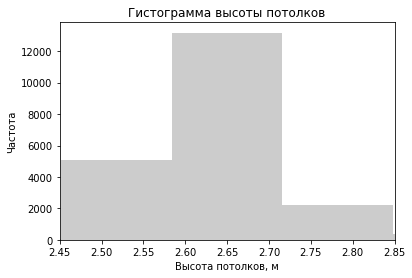

In [40]:
sns.distplot(data['ceiling_height'], kde=False, bins=750, color='gray')
plt.xlim(det_whiskers('ceiling_height')[0], det_whiskers('ceiling_height')[1])
plt.title("Гистограмма высоты потолков")
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')

Больше всего продается квартир с высотой потолков 2.6-2.7 метров.  Среднее значение высоты потолков составляет 2.7 метров, медиана - 2.65 метров

Посмотрим долю аномальных значений

In [41]:
print_anomalies_ratio('ceiling_height')

'Аномальные значения составляют 12.3% от всей выборки'

Добавим столбец с признаком, описывающим недвижимость с аномально большим числом высоты потолков

In [42]:
data['unusual_ceiling'] = (data['ceiling_height'] > det_whiskers('ceiling_height')[1]) | (data['ceiling_height'] < det_whiskers('ceiling_height')[0])

### Изучим время продажи квартиры

**Построим диаграмму размаха**

count    20379.000000
mean       180.760194
std        219.695578
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

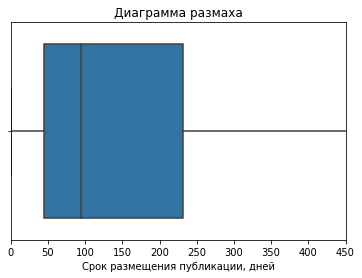

In [43]:
sns.boxplot(data['days_exposition'])
plt.title('Диаграмма размаха')
plt.xlabel('Срок размещения публикации, дней')
_ = plt.xlim(0, 450)
data['days_exposition'].describe()

**Построим гистограмму**

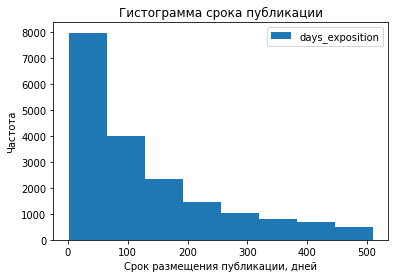

In [44]:
data.plot(y='days_exposition', 
          kind='hist', 
          range=(det_whiskers('days_exposition')[0], det_whiskers('days_exposition')[1]), 
          bins=8)
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
_ = plt.ylabel('Частота')

Больше всего продается квартир в период между 45 и 231 днями. Среднее значение составляет 180 дней, медиана - 95 дней

**Дальше уберем выбросы**

In [45]:
data['too_slow'] = data['days_exposition'] > det_whiskers('days_exposition')[1]
data['too_fast'] = data['days_exposition'] < 45

In [46]:
good_data = data[(data['too_large_area'] == False) & 
     (data['too_expensive'] == False) &
     (data['too_many_rooms'] == False) &
     (data['unusual_ceiling'] == False) &
     (data['too_slow'] == False) &
     (data['too_fast'] == False)].reset_index(drop=True)

### Какие факторы больше всего влияют на стоимость квартиры

**I. Изучим зависимость цены от: площади квартиры, числа комнат, этажа, удалённости от центра**

**1. Изучим зависимость цены от площади квартиры**

**Построим диаграмму рассеивания**

-0.07965760923858099

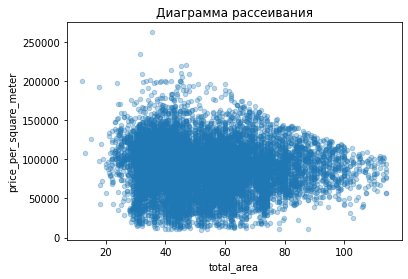

In [47]:
good_data.plot(kind='scatter', y='price_per_square_meter', x='total_area', alpha=0.3)
plt.title('Диаграмма рассеивания')
good_data['total_area'].corr(good_data['price_per_square_meter'])

Коэффициент корреляции Пирсона равен -0.07. Стоимость квадратного метра снижается при увеличении площади квартиры 

**2. Изучим зависимость цены от числа комнат**

-0.0062866653782404445


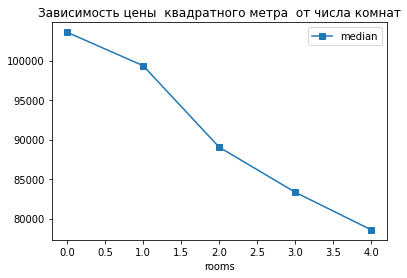

In [48]:
pivot_table_rooms = good_data.pivot_table(index='rooms', values='price_per_square_meter', aggfunc=['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y='median', marker='s')
pivot_table_rooms.query('count > 50').sort_values('median', ascending=False)
plt.title('Зависимость цены  квадратного метра  от числа комнат')
print(good_data['rooms'].corr(data['price_per_square_meter']))

Коэффициент корреляции Пирсона составляет -0.0069, то есть мы получили отрицательную корреляцию. Стоимость квадратного метра снижается при увеличении числа комнат

**Посмотрим как цена коррелирует общей площадью**

0.6759008402144069

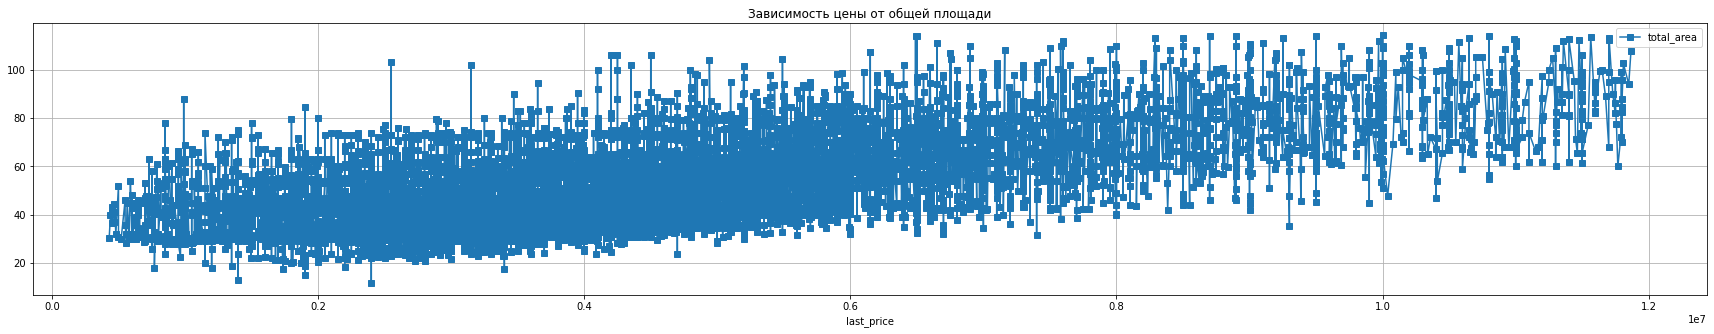

In [49]:
(good_data
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='s-',figsize=(30,5))
)
plt.title('Зависимость цены от общей площади')
good_data['last_price'].corr(good_data['total_area'])

Коэффициент Пирсона равен 0.67. Стоимость квартиры увеличивается при увеличении площади

**И посмотрим как цена коррелирует количеством комнат**

0.403672020376913

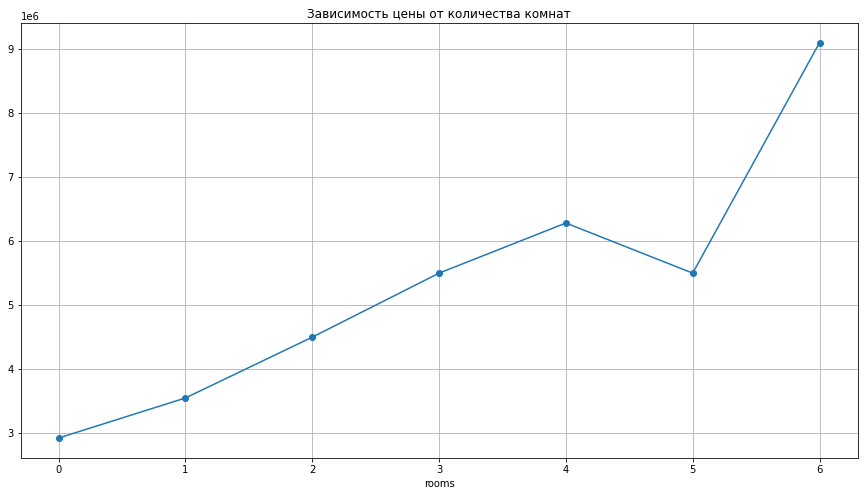

In [50]:
(good_data
     .groupby('rooms')['last_price'].median()
    # .sort_values(by='rooms',ascending=True)
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)
plt.title('Зависимость цены от количества комнат')
good_data['last_price'].corr(good_data['rooms'])

Коэффициент Пирсона равен 0.4. Стоимость квартиры увеличивается при увеличении количества комнат

**3. Изучим зависимость цены от этажа**

**Построим гистограмму**

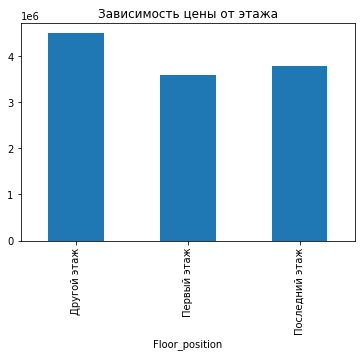

In [51]:
(good_data
    .groupby('Floor_position')['last_price'].median()
    .plot(x='Floor_position',y='last_price',kind='bar')
)
plt.title('Зависимость цены от этажа')
plt.show()

Из гистограммы видно, что на первом этаже квартиры стоят дешевле, так как спрос на них ниже

**4. Изучим зависимость цены от удалённости от центра**

-0.4040714544803706

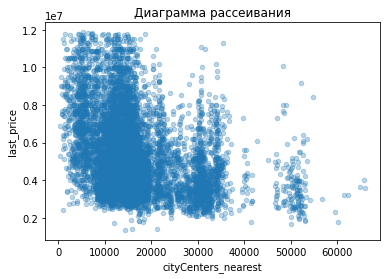

In [52]:
good_data.plot(kind='scatter', y='last_price', x='cityCenters_nearest', alpha=0.3)
plt.title('Диаграмма рассеивания')
good_data['cityCenters_nearest'].corr(good_data['price_per_square_meter'])

Коэффициент корреляции Пирсона - 0.4, т.е. связь умеренная, отрицательная корреляция цены и удаленности от центра. То есть чем ближе к центру расположена квартира, тем выше ее стоимость

**II. Изучим зависимость цены от даты размещения**

**1. Изучим зависимость цены от дня недели**

,mean,count,median
weekday,,,
0,4.617799e+06,2131,4300000.0
2,4.662360e+06,2306,4300000.0
4,4.620948e+06,2344,4300000.0
3,4.625232e+06,2403,4299000.0
6,4.612553e+06,987,4299000.0
1,4.660880e+06,2377,4250000.0
5,4.485462e+06,1156,4200000.0


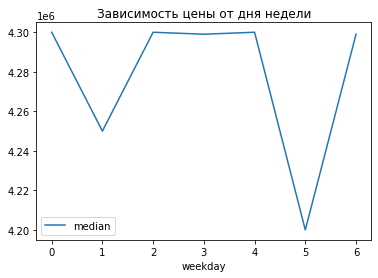

In [53]:
pivot_table_weekday_exposition = good_data.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
plt.title('Зависимость цены от дня недели')
pivot_table_weekday_exposition.sort_values('median', ascending=False)

Из гистограммы видно, что цены ниже во вторник и субботу, вероятно, потому что люди менее активны в эти дни, а больше всего - в понедельник, среду и пятницу, возможно, что поэтому в эти дни люди назначают более высокие цены

**2. Изучим зависимость цены от месяца**

,mean,count,median
month,,,
4,4.713877e+06,1566,4490000.0
12,4.722092e+06,931,4400000.0
10,4.729645e+06,1191,4375000.0
11,4.714127e+06,1218,4350000.0
2,4.625302e+06,1575,4300000.0
9,4.649960e+06,1091,4300000.0
3,4.576360e+06,1431,4290000.0
1,4.552639e+06,880,4214994.0
5,4.549256e+06,805,4200000.0


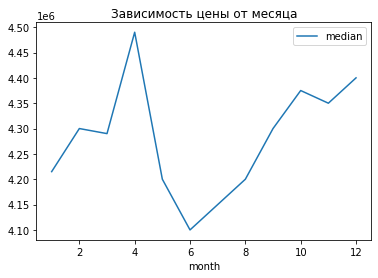

In [54]:
pivot_table_month_exposition = good_data.pivot_table(index='month', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
plt.title('Зависимость цены от месяца')
pivot_table_month_exposition.sort_values('median', ascending=False)

Из гистограммы видно, что цены ниже всего в мае и летом. Возможно, падает спрос из-за того, что люди уезжают в отпуска, а выше всего весной в апреле и растут осенью. Это может быть связано с тем, что в месяцы после новогодних праздников спрос снижается (много выходных дней, люди больше тратят деньги на отдых и подарки)

**3. Изучим зависимость цены от года**

,mean,count,median
year,,,
2014,5.948000e+06,5,6200000.0
2019,4.904393e+06,1663,4700000.0
2015,4.741127e+06,410,4324500.0
2018,4.597280e+06,4995,4300000.0
2017,4.567422e+06,4982,4160000.0
2016,4.552241e+06,1649,4150000.0


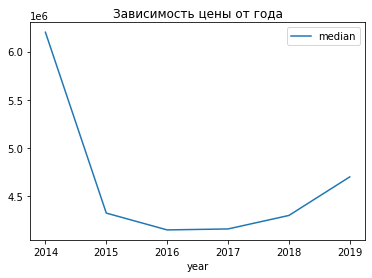

In [55]:
pivot_table_year_exposition = good_data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
plt.title('Зависимость цены от года')
pivot_table_year_exposition.sort_values('median', ascending=False)

Из гистограммы видно, что цены росли в период с 2016 по 2019 гг. - это может быть связано с тем, что в 2014 году начался кризис, ввели экономические санкции, что, скорей всего, привело к снижению доходов населения и темпов строительства. Затем постепенно рынок восстановился. Снижение ставки по ипотеке, а также политика застройщиков могла привести к увеличению цен

**III. Выведем среднюю цену квадратного метра в десяти населенных пунктах с наибольшим числом объявлений**

In [56]:
locality_pivot_table = good_data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending=False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,8211,104867.475582
посёлок Мурино,328,85190.216463
посёлок Шушары,318,78918.273585
Всеволожск,286,67192.041958
посёлок Парголово,237,89988.371308
Колпино,220,75179.400000
Пушкин,220,98868.872727
Гатчина,208,67515.975962
деревня Кудрово,187,92283.064171


**Самая высокая стоимость**

In [57]:
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,8211,104867.475582


В Санкт-Петербурге больше всего объявлений и самая высокая цена квадратного метра

**Самая низкая стоимость**

In [58]:
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,155,56931.341935


В Выборге меньше всего объявлений и самая низкая цена квадратного метра

### Изучим предложение квартир в центре

**I. Создадим столбец с расстоянием до центра в километрах и почитаем среднюю цену для каждого километра**

                last_price  price_per_square_meter
citycenters_km                                    
0.0              6100000.0                126560.5
1.0              7750000.0                106899.5
2.0              7950000.0                112195.0
3.0              7125000.0                109853.5
4.0              6985000.0                111881.0
5.0              7100000.0                117326.5
6.0              6750000.0                119444.0
7.0              6300000.0                115384.0
8.0              5925000.0                117607.0
9.0              4700000.0                103539.0


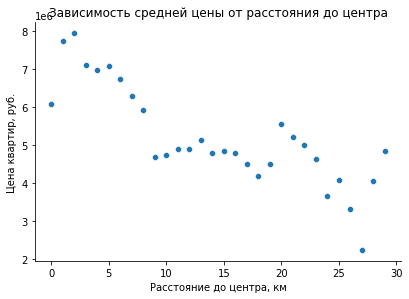

In [59]:
data['citycenters_km'] = round(data['cityCenters_nearest'] / 1000, 0)
data['citycenters_km'] = data['citycenters_km'].astype('int', errors='ignore')
good_data = data[(data['too_large_area'] == False) & 
     (data['too_expensive'] == False) &
     (data['too_many_rooms'] == False) &
     (data['unusual_ceiling'] == False) &
     (data['too_slow'] == False) &
     (data['too_fast'] == False)].reset_index(drop=True)

good_data.loc[(good_data['locality_name'] == 'Санкт-Петербург') & (good_data['citycenters_km'].notna()), 'citycenters_km'].apply(round)
spb_data = good_data.query('locality_name == "Санкт-Петербург"')
spb_center_nearest = spb_data.pivot_table(index='citycenters_km', values=['last_price', 'price_per_square_meter'], aggfunc='median')
print(spb_center_nearest.head(10))

#построим график
sns.relplot(x=spb_center_nearest.index, y='last_price', data=spb_center_nearest, height=4, aspect=1.4)
plt.title('Зависимость средней цены от расстояния до центра')
plt.ylabel('Цена квартир, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

Достаточно сильно график меняется после 3 и 8 км

**II. Проанализируем эту территорию и изучим параметры**

**Возьмем за центральную границу 8 км:**

In [60]:
center_spb_data = good_data[(good_data['citycenters_km'] <= 8) & (good_data['locality_name'] == 'Санкт-Петербург')]

**1. Изучим данные по параметру площадь квартиры**

**Построим гистограмму**

count    1093.000000
mean       60.712855
std        20.221083
min        12.000000
25%        44.300000
50%        58.900000
75%        74.000000
max       114.200000
Name: total_area, dtype: float64

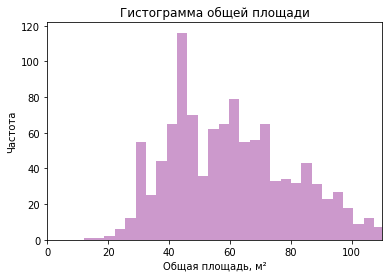

In [61]:
sns.distplot(center_spb_data['total_area'], kde=False, bins=30, color='purple')
plt.xlim(0, 110)
plt.title('Гистограмма общей площади')
plt.ylabel('Частота')
plt.xlabel('Общая площадь, м²')

#выведем числовое описание данных
center_spb_data['total_area'].describe()

Больше всего продается квартир площадью 44.3-74 м²

**2. Изучим данные по параметру цена**

**Построим гистограмму**

count    1.093000e+03
mean     7.041056e+06
std      2.215451e+06
min      2.400000e+06
25%      5.300000e+06
50%      6.850000e+06
75%      8.700000e+06
max      1.186686e+07
Name: last_price, dtype: float64

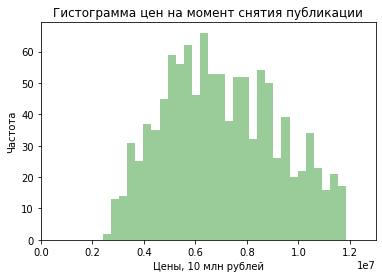

In [62]:
sns.distplot(center_spb_data['last_price'], kde=False, bins=30, color='green')
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.ylabel('Частота')
center_spb_data['last_price'].describe()

Больше всего продается квартир за 5.3-8.7 млн руб

**3. Изучим данные по параметру число комнат**

**Построим гистограмму**

count    1093.000000
mean        2.105215
std         0.918322
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

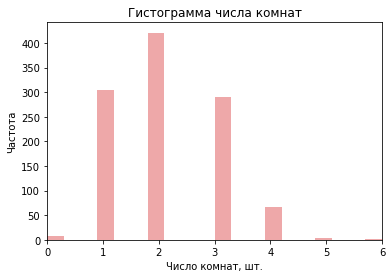

In [63]:
sns.distplot(center_spb_data['rooms'], kde=False, bins=20, color='tab:red')
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Частота')
center_spb_data['rooms'].describe()

В центральном районе больше всего продаются однокомнатные, двухвухкомнатные и трехкомнатные квартиры

**4. Изучим данные по параметру высота потолков**

**Построим гистограмму**

count    1093.000000
mean        2.654300
std         0.077885
min         2.460000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.850000
Name: ceiling_height, dtype: float64

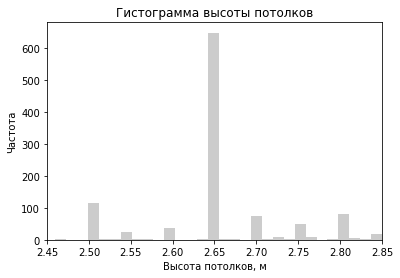

In [64]:
sns.distplot(center_spb_data['ceiling_height'], kde=False, bins=30, color='gray')
plt.xlim(det_whiskers('ceiling_height')[0], det_whiskers('ceiling_height')[1])
plt.title("Гистограмма высоты потолков")
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')
center_spb_data['ceiling_height'].describe()

В центральном районе больше всего продается квартир с высотой потолка 2.65 м

### Выделим факторы, которые влияют на стоимость квартиры

**I. Изучим зависимость цены от числа комнат**

-0.47368594003425535

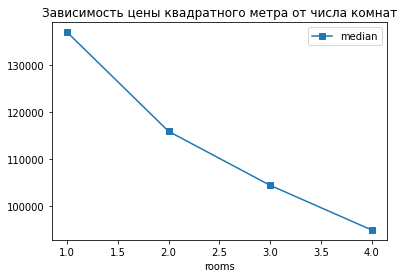

In [65]:
center_spb_rooms = center_spb_data.pivot_table(index='rooms', values='price_per_square_meter', aggfunc=['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y='median', marker='s')
center_spb_rooms.query('count > 50').sort_values('median', ascending=False)
plt.title('Зависимость цены квадратного метра от числа комнат')
center_spb_data['rooms'].corr(center_spb_data['price_per_square_meter'])

Коэффициент корреляции Пирсона равен -0.47. Стоимость квадратного метра снижается при увеличении числа комнат

**Корреляция цены квадратного метра и площади квартиры**

In [66]:
center_spb_data['total_area'].corr(center_spb_data['price_per_square_meter'])

-0.38955042612308455

Коэффициент Пирсона равен -0.38. Стоимость квадратного метра снижается при увеличении площади квартиры

**Корреляция цены и площади квартиры**

In [67]:
center_spb_data['last_price'].corr(center_spb_data['total_area'])

0.7432245604677662

Коэффициент Пирсона равен 0.74. Стоимость квартиры увеличивается при увеличении площади

**Корреляция цены и числа комнат**

In [68]:
center_spb_data['last_price'].corr(center_spb_data['rooms'])

0.4678646457095163

Коэффициент Пирсона равен 0.46. Стоимость квартиры увеличивается при увеличении числа комнат

**II. Изучим зависимость цены от этажа**

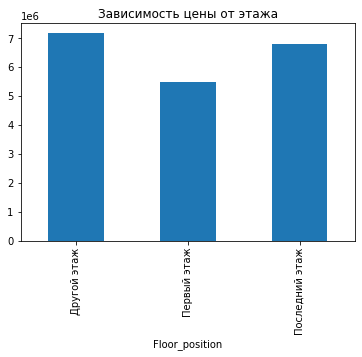

In [69]:
(center_spb_data
    .groupby('Floor_position')['last_price'].median()
    .plot(x='Floor_position', y='last_price', kind='bar')
)
plt.title('Зависимость цены от этажа')
plt.show()

Из гистограммы видно, что в центре, также как и во всей выборке, на первом этаже квартиры стоят дешевле, так как спрос на них ниже

**III. Изучим зависимость цены от удалённости от центра**

-0.1575962424786922

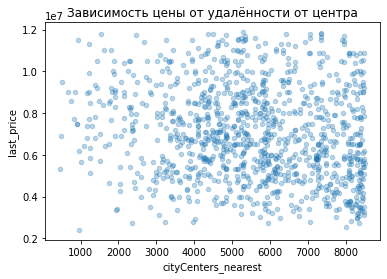

In [70]:
center_spb_data.plot(kind='scatter', y='last_price', x='cityCenters_nearest', alpha=0.3)
plt.title('Зависимость цены от удалённости от центра')
center_spb_data['cityCenters_nearest'].corr(center_spb_data['last_price'])

Коэффициент корреляции Пирсона - 0.15, то есть чем ближе к центру квартира, тем выше ее стоимость

**IV. Изучим зависимость цены от удалённости от даты размещения объявления**

**1. Изучим зависимость цены от дня недели**

,mean,count,median
weekday,,,
6,7.530766e+06,70,7800000.0
2,7.126974e+06,197,6990000.0
1,7.109949e+06,185,6950000.0
4,7.091721e+06,201,6850000.0
5,6.949033e+06,90,6837527.5
0,6.902162e+06,155,6690000.0
3,6.813757e+06,195,6500000.0


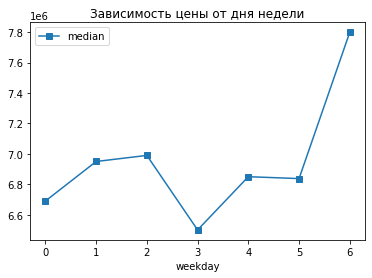

In [71]:
center_spb_weekday_exposition = center_spb_data.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y='median', marker='s')
plt.title('Зависимость цены от дня недели')
center_spb_weekday_exposition.sort_values('median', ascending=False)

Из гистограммы видно, что цены ниже в четверг и понедельник, потому что люди менее активны в эти дни, а больше всего - в среду и воскресенье (как во всей выборке), поэтому в эти дни люди назначают более высокие цены

**2. Изучим зависимость цены от месяца**

,mean,count,median
month,,,
11,7.310428e+06,96,7400000.0
9,7.194103e+06,86,7200000.0
8,7.157012e+06,69,7100000.0
1,7.013185e+06,63,6990000.0
10,7.263406e+06,114,6970318.5
3,7.122244e+06,113,6950000.0
12,7.094356e+06,80,6942615.0
5,6.805612e+06,74,6815000.0
4,6.957021e+06,125,6800000.0


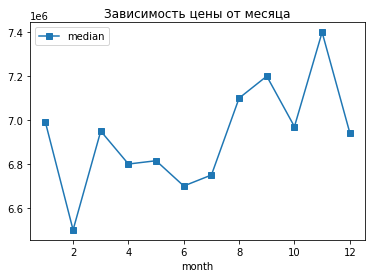

In [72]:
center_spb_month_exposition = center_spb_data.pivot_table(index='month', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y='median', marker='s')
plt.title('Зависимость цены от месяца')
center_spb_month_exposition.sort_values('median', ascending=False)

Из графика видно, что цены ниже летом и после новогодних праздников. Люди в это время все также, скорей всего, тратят деньги на путешествия и подарки, поэтому спрос и цены на квартиры ниже. А увеличивается также весной и осенью

**3. Изучим зависимость цены от года**

,mean,count,median
year,,,
2019,7.265589e+06,95,7200000.0
2018,7.150407e+06,340,6925000.0
2017,7.006910e+06,445,6830000.0
2016,6.860835e+06,167,6690000.0


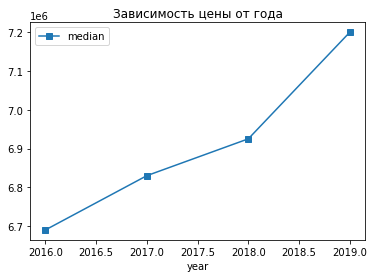

In [73]:
center_spb_year_exposition = center_spb_data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y='median', marker='s')
plt.title('Зависимость цены от года')
center_spb_year_exposition.query('count > 50').sort_values('median', ascending=False)

Цены в центре Санкт-Петербурга в период с 2016 по 2019 годы росли, что совпадает с динамикой цен по всей выборке

### Вывод

В нашей выборке средняя квартира, которая была выставлена на продажу, имеет следующие характеристики: это 2-х комнатная квартира площадью 52 м² с потолками 2.65 м, проданная за 95 дней по цене 4.6 млн рублей.
Как правило, продажа квартиры занимала 95 дней. Если продажа квартиры осуществилась после 420 дней с момента публикации то, это говорит об аномально долгой продаже. Если продажа квартиры осуществлялась до 45 дней, то это говорит об аномально быстрой продаже.

1.	Факторы, влияющие на стоимость квартиры:
* Стоимость квадратного метра снижается при увеличении площади квартиры (коэффициент корреляции Пирсона -0.07);
* Стоимость квадратного метра снижается при увеличении числа комнат (коэффициент корреляции Пирсона -0.006);
* Стоимость квартиры увеличивается при увеличении площади (коэффициент Пирсона равен 0.67.);
* Стоимость квартиры увеличивается при увеличении количества комнат (коэффициент Пирсона равен 0.4.);
* Чем ближе к центру расположена квартира, тем выше ее стоимость (коэффициент корреляции Пирсона - 0.4);
* При этом квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах, так как люди не хотят проблем с крайними этажами.

2.	Зависимость цены от даты размещения:
* Анализ по дням недели показал, что цены ены ниже во вторник и субботу, вероятно, потому что люди менее активны в эти дни, а больше всего - в понедельник, среду и пятницу;
* В мае и летом цены ниже всего. Возможно, падает спрос из-за того, что люди уезжают в отпуска, а выше всего весной в апреле и также растут осенью. Это может быть связано с тем, что в месяцы после новогодних праздников спрос снижается (много выходных дней, люди больше тратят деньги на отдых и подарки);
* Цены росли в период с 2016 по 2019 гг. - это может быть связано с тем, что в 2014 году начался кризис, ввели экономические санкции, что, скорей всего, привело к снижению доходов населения и темпов строительства. Затем постепенно рынок восстановился. Снижение ставки по ипотеке, а также политика застройщиков могла привести к увеличению цен.

3.	10 населенных пунктов с наибольшим числом объявлений
Из 10 населенных пунктов с наибольшим числом объявлений наибольшая средняя цена квадратного метра в следующих населенных пунктах:
* Санкт-Петербург;
* Пушкин;
* деревня Кудрово.

При этом дешевле всего квадратные метры в среднем в Выборге и Всеволожске.

4.	Рассматривая сегмент квартир в центре Санкт-Петербурга можно сделать вывод, что средняя квартира, которая была выставлена на продажу, имеет следующие характеристики: это 2-х комнатная квартира площадью 58.9 м² с потолками 2.65 м, проданная за 95 дней по цене 6.85 млн рублей.


5. Факторы, влияющие на стоимость квартиры:
* Стоимость квадратного метра снижается при увеличении площади квартиры (коэффициент корреляции Пирсона -0.38);
* Стоимость квадратного метра снижается при увеличении числа комнат (коэффициент корреляции Пирсона -0.47);
* Стоимость квартиры увеличивается при увеличении площади (коэффициент Пирсона равен 0.67.);
* Стоимость квартиры увеличивается при увеличении количества комнат (коэффициент Пирсона равен 0.46);
* Чем ближе к центру расположена квартира, тем выше ее стоимость (коэффициент корреляции Пирсона - 0.15);
* При этом квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах, так как люди не хотят проблем с крайними этажами.

6. Зависимость цены от даты размещения:
* Цены ниже в четверг и понедельник, возможно, потому что люди менее активны в эти дни, а больше всего - в среду и воскресенье (как во всей выборке), поэтому в эти дни люди назначают более высокие цены;
* Цены ниже летом и после новогодних праздников. Люди в это время все также, скорей всего, тратят деньги на путешествия и подарки, поэтому спрос и цены на квартиры ниже. А увеличивается также весной и осенью;
* В период с 2016 по 2019 годы в среднем цены росли, что совпадает с динамикой цен по всей выборке.

## Общий вывод

Для определения рыночной стоимости квартиры важны следующие параметры:
* общая площадь квартиры (как правило, чем больше площадь квартире, тем дороже она продается)
* число комнат (чем больше в квартире комнат, тем дороже она продается)
* расстояние до центра (чем ближе к центру расположена квартира, тем выше ее стоимость)
* этаж квартиры (квартиры на первом или последнем этаже продаются дешевле, чем квартиры на других этажах)
* срок продажи квартиры (слишком быстрая продажа - до 45 дней, слишком долгая продажа после 420 дней).